In [1]:
from test_structure import *
from GPyOpt.methods import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [5]:
def beam_n(X, n, EI_req = 1*10**6):
    """
    beam model
    function for n extra non basic nodes
    X[0:3*n] are node locations (x, y, z for each node)
    X[3*n:] are member diameters (8+n*8+n*(n-1)/2)
    EI_req is required EI
    """
    beam = test_struct()
    node_locs = np.array(X[0:3*n]).reshape(n, 3)
    beam.make_nodes(node_locs)
    beam.make_mem_ps(X[3*n:])
    beam.make_struct()
    beam.record_struct_info()
    EI = beam.get_EI(100)
    print(EI)
    
    if np.isnan(EI) or beam.min_l<0.01:
        return(10**9)
    else:
        return(beam.mass+10**7*max(1/EI-1/EI_req, 0))

In [6]:
def truss_n(X, n, EI_req = 1*10**6):
    """
    truss model (release moments at nodes)
    function for n extra non basic nodes
    X[0:3*n] are node locations (x, y, z for each node)
    X[3*n:] are member diameters (8+n*8+n*(n-1)/2)
    EI_req is required EI
    """
    truss = test_struct()
    node_locs = np.array(X[0:3*n]).reshape(n, 3)
    truss.make_nodes(node_locs)
    truss.make_mem_ps(X[3*n:])
    truss.make_struct()
    truss.release_moments()
    truss.record_struct_info()
    EI = truss.get_EI(100)
    print(EI)
    
    if np.isnan(EI) or truss.min_l<0.01:
        return(10**9)
    else:
        return(truss.mass+10**7*max(1/EI-1/EI_req, 0))

In [7]:
def unit_n(X, n, EI_req = 1*10**6):
    """
    unit cell beam model
    function for n extra non basic nodes
    X[0:3*n] are node locations (x, y, z for each node)
    X[3*n:] are member diameters (8+n*8+n*(n-1)/2)
    EI_req is required EI
    """
    
    beam = test_struct(num_units=1)
    node_locs = np.array(X[0:3*n]).reshape(n, 3)
    beam.make_nodes(node_locs)
    beam.make_mem_ps(X[3*n:])
    beam.make_struct()
    beam.record_struct_info()
    EI = beam.get_EI(100)
    print(EI)

    if np.isnan(EI) or beam.min_l<0.01:
        return(10**9)
    else:
        return(beam.mass+10**7*max(1/EI-1/EI_req, 0))

In [8]:
def equiv_cant_n(X, n, EI_req = 1*10**6):
    """
    EI calculated using equivalent cantilever model (circular crosssection, match mass)
    function for n extra non basic nodes
    X[0:3*n] are node locations (x, y, z for each node)
    X[3*n:] are member diameters (8+n*8+n*(n-1)/2)
    EI_req is required EI
    """
    beam = test_struct(num_units=1)
    node_locs = np.array(X[0:3*n]).reshape(n, 3)
    beam.make_nodes(node_locs)
    beam.make_mem_ps(X[3*n:])
    beam.make_struct()
    beam.record_struct_info()
    equiv_EI = beam.get_equiv_EI()
    print(equiv_EI)
    
    if np.isnan(equiv_EI) or beam.min_l<0.01:
        return(10**9)
    else:
        return(beam.mass+10**7*max(1/equiv_EI-1/EI_req, 0))

# function testing

In [6]:
#test nodes
node_locs = [0.5, 0.2, 0.3, 0.6, 0.8, 1, 0, 0.2, 0.5]
member_ds = [0.004]*35
X = [node_locs+member_ds]

In [24]:
n = 3
hf_f = beam_n
lf_f = unit_n
def f_hf(X):
    return(hf_f(X[0], n, 1*10**6))
def f_lf(X):
    return(lf_f(X[0], n, 1*10**6))

In [25]:
print(f_hf(X))
print(f_lf(X))

...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
deflection 1.2430926205872268 m
13729.199565680401
718.37501306149
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
deflection 0.010772152711588646 m
3094.3985130728274
3221.6458728101506


# optimisation test

In [9]:
node_domain = [{'name':'node_coord', 'type':'continuous', 'domain':(0, 1)}]
d_domain = [{'name':'member_d', 'type':'continuous', 'domain':(0, 0.1)}]

domain = node_domain*n*3 + d_domain*int((n+1)*8+n*(n-1)/2)
#optimising for 1 non basic node, require EI 1*10**6
myOpt = BayesianOptimization(f_hf,
                             domain=domain,
                             acquisition_type="EI",
                             model_type='GP',
                             exact_feval=True)
myOpt.run_optimization(max_iter = 100, max_time = 600, eps=1e-6)

...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
1532921.4222426333
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
1653257.1934707935
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
2210186.2875244394
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding 

...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
835790.5524754879
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
2101850.3998951185
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
1532564.5736250153
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding q

...Calculating reactions
1198742.3841673469
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
1186858.566739822
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
3394130.874037797
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
1337089.1933505426
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness t

...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
2319504.4050804884
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
1183319.0057155138
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
1592038.565376192
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding q

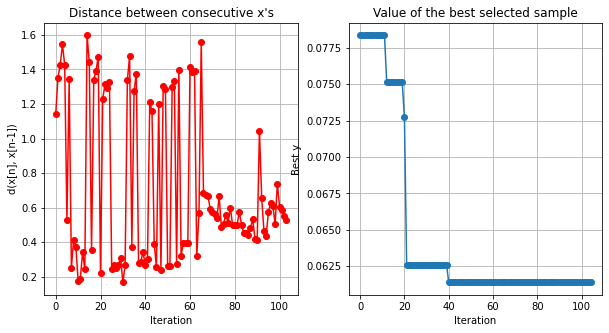

In [10]:
myOpt.plot_convergence()

In [11]:
print(myOpt.x_opt)

[0.25893989 0.05099436 0.41226327 0.64018333 0.88810962 0.93056278
 0.03317597 0.51748514 1.         0.04866365 0.00473031 0.00707034
 0.00215013 0.06432066 0.1        0.04881317 0.06095826 0.09326415
 0.         0.00793955 0.01078213 0.03421341 0.01403418 0.06532222
 0.02042016 0.02782759 0.02427265 0.01349797 0.0298419  0.04516547
 0.03371648 0.02999898 0.03166988 0.         0.04298988 0.03033667
 0.06781703 0.         0.05497634 0.06679546 0.1        0.03911855
 0.00854872 0.07656692]


In [13]:
opt_beam = test_struct()
node_locs = np.array(myOpt.x_opt[0:3*n]).reshape(n, 3)
opt_beam.make_nodes(node_locs)
opt_beam.make_mem_ps(myOpt.x_opt[3*n:])
opt_beam.make_struct()
opt_beam.record_struct_info()
EI = opt_beam.get_EI(100)
print(EI)
print(opt_beam.mass)
print(opt_beam.min_l)

...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
1620842.9131354482
0.06138632894849769
0.3831566506363386


In [14]:
Visualization.RenderModel(opt_beam.struct, deformed_shape=True, deformed_scale=1, text_height=0.05)

vtkPolyData (0x7ff0ab56f360)
  Debug: Off
  Modified Time: 94752
  Reference Count: 3
  Registered Events: (none)
  Information: 0x7ff0ab56f4e0
  Data Released: False
  Global Release Data: Off
  UpdateTime: 0
  Field Data:
    Debug: Off
    Modified Time: 94741
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 0
  Number Of Cells: 0
  Cell Data:
    Debug: Off
    Modified Time: 94744
    Reference Count: 1
    Registered Events: 
      Registered Observers:
        vtkObserver (0x7ff0ab56fa10)
          Event: 33
          EventName: ModifiedEvent
          Command: 0x7ff0ab56f6e0
          Priority: 0
          Tag: 1
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
    Copy Tuple Flags: ( 1 1 1 1 1 0 1 1 1 1 1 )
    Interpolate Flags: ( 1 1 1 1 1 0 0 1 1 1 1 )
    Pass Through Flags: ( 1 1 1 1 1 1 1 1 1 1 1 )
    Scalars: (none)
    Vectors: (none)
    Norm